In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
assests = pd.read_csv(r"C:\Users\91966\Desktop\Rocket Data Challenge\Assets.csv")
borrowers = pd.read_csv(r"C:\Users\91966\Desktop\Rocket Data Challenge\Borrowers.csv")
CreditReports = pd.read_csv(r"C:\Users\91966\Desktop\Rocket Data Challenge\CreditReports.csv")
incomes = pd.read_csv(r"C:\Users\91966\Desktop\Rocket Data Challenge\Incomes.csv")
liabilities = pd.read_csv(r"C:\Users\91966\Desktop\Rocket Data Challenge\Liabilities.csv")
mortgages = pd.read_csv(r"C:\Users\91966\Desktop\Rocket Data Challenge\Mortgages.csv")


In [4]:
def get_info(df, df_name):    
    print("\n\nDescription of ",df_name)
    info = df.info()
    print("\n\nDimension - ",df.shape)
    desc = df.describe()
    print("\n\nNull values per column\n",df.isnull().sum())
    if 'APPLICATIONID' in df.columns:
        print("\n\nUnique Applications",df['APPLICATIONID'].nunique())

get_info(assests, "assests")




Description of  assests
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60702 entries, 0 to 60701
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   APPLICATIONID  60702 non-null  object 
 1   ASSET_ID       60702 non-null  object 
 2   TYPE           60702 non-null  object 
 3   VALUE          60702 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.9+ MB


Dimension -  (60702, 4)


Null values per column
 APPLICATIONID    0
ASSET_ID         0
TYPE             0
VALUE            0
dtype: int64


Unique Applications 19127


In [5]:
# Asset_ID not present in any other table also contains only alpha numeric values so not useful for analysis
assests.drop('ASSET_ID', axis=1, inplace=True)

In [6]:
assests

,APPLICATIONID,TYPE,VALUE
0,400ef336-9f32-4b57-bad2-aa0093f58db3,investment,9000.0
1,16d4a079-dfd8-48a8-90f7-f89e288bc601,vehicle,60000.0
2,b936c281-64ab-45ab-b9e8-df19895a4bc8,rrsp,243000.0
3,400ef336-9f32-4b57-bad2-aa0093f58db3,cash_savings,20000.0
4,400ef336-9f32-4b57-bad2-aa0093f58db3,cash_savings,40000.0
...,...,...,...
60697,c925dc43-2801-4365-badf-73c672959352,investment,6600.0
60698,c925dc43-2801-4365-badf-73c672959352,investment,16428.0
60699,c925dc43-2801-4365-badf-73c672959352,vehicle,6500.0
60700,c925dc43-2801-4365-badf-73c672959352,vehicle,17500.0


In [7]:
print("Types of assets and it's count owned by client", assests['TYPE'].value_counts())
# RRSP - Registered Retirement Savings Plan

Types of assets and it's count owned by client TYPE
vehicle          14959
cash_checking    12725
cash_savings      9324
rrsp              9322
investment        7900
other             4806
gift              1666
Name: count, dtype: int64


In [8]:
# Minimum and Maximum value of assets
print("Minimum  and Max value of Asset", min(assests['VALUE']), max(assests['VALUE']))


Minimum  and Max value of Asset 0.01 20000000.0


In [9]:
# Fetch records where value <=10 , value contains no of assets too which are not as important as count
Insignificant_values = assests[assests['VALUE'] <= 10].index
assests.drop(Insignificant_values, inplace=True)

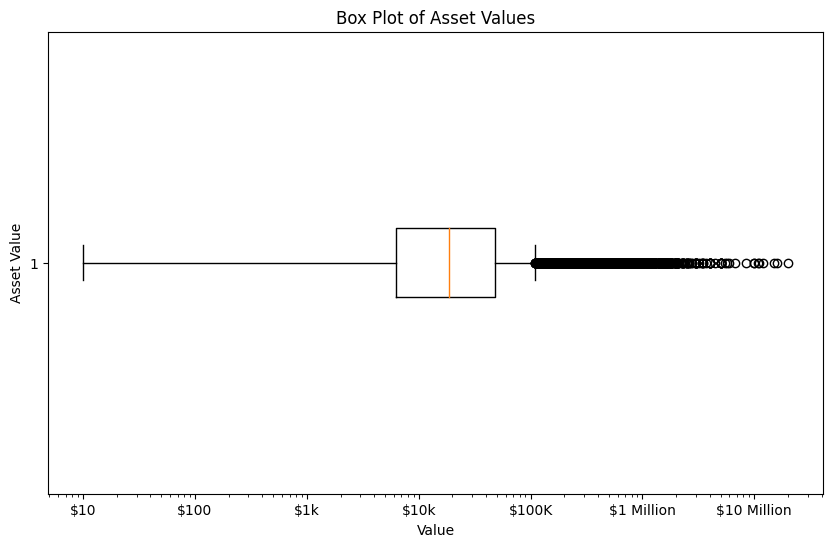

In [10]:
plt.figure(figsize=(10, 6))
plt.boxplot(assests['VALUE'], vert=False)
plt.title('Box Plot of Asset Values')
plt.xlabel('Value')
plt.ylabel('Asset Value')  # Added label for the Y axis
plt.xscale('log')  # Logarithmic scale for better visualization
# Setting custom ticks on the X axis to represent monetary values
plt.xticks([10, 100, 1000, 10000, 100000, 1000000, 10000000],
           ['$10', '$100', '$1k', '$10k', '$100K', '$1 Million', '$10 Million'])
plt.show()



### Borrowers

In [11]:
borrowers


,APPLICATIONID,DEPENDENTS,FIRSTTIME,BORROWER_ID,INCLUDERENTALAMOUNTMONTHLYTDS,ISHIDDEN,ISMAINBORROWER,MARITAL,RELATIONSHIPTOMAINBORROWER,RENTALAMOUNTMONTHLY
0,7fd3c8b1-bfe2-4ee5-9e45-1b3512e81e4b,NaN,NaN,4050056a-2897-4587-8e90-7dd4cb49cec6,NaN,False,True,NaN,NaN,NaN
1,94ae848b-cafb-4464-b545-1957b0c2f713,0.0,NaN,a992d0ef-6099-4bb1-bf9d-bc6037e7138c,NaN,False,True,widowed,NaN,NaN
2,e6c15716-f72c-4dcf-a095-30e3da06d3a0,0.0,NaN,1bc0442b-d7e9-4c71-8126-c9734b187f9b,NaN,False,True,married,NaN,NaN
3,e18bcfe8-b6e8-4636-8937-8360e69d822f,NaN,NaN,a45fe05c-07b8-499f-8746-2cc2634dd864,NaN,False,True,NaN,NaN,NaN
4,ace015ef-cc39-45af-9cdd-fa855edc935a,NaN,NaN,26a89b13-7b68-4a12-a539-12c5b4538b75,NaN,False,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
80877,36f75297-2985-43c3-991d-a0b4b4e1e814,1.0,True,951d87c2-b5b7-426c-a612-996550697073,False,False,False,married,spouse,600.0
80878,36f75297-2985-43c3-991d-a0b4b4e1e814,1.0,True,43229fe0-3f3d-4b7a-82de-80a6f793a884,False,False,True,married,NaN,600.0
80879,c925dc43-2801-4365-badf-73c672959352,NaN,True,6f50edd5-c0ad-461b-9715-b24dab9109c1,NaN,False,True,single,NaN,NaN
80880,1f34fe95-49b8-4d17-8bc2-28b926c0d399,0.0,True,f35b4788-a661-4511-b634-b1d6f94b395c,False,False,False,married,spouse,1.0


TDS - Tax deduction at souce

In [12]:
get_info(borrowers, "borrowers")



Description of  borrowers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80882 entries, 0 to 80881
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   APPLICATIONID                  80882 non-null  object 
 1   DEPENDENTS                     46356 non-null  float64
 2   FIRSTTIME                      26149 non-null  object 
 3   BORROWER_ID                    80882 non-null  object 
 4   INCLUDERENTALAMOUNTMONTHLYTDS  2129 non-null   object 
 5   ISHIDDEN                       80882 non-null  bool   
 6   ISMAINBORROWER                 80882 non-null  bool   
 7   MARITAL                        53057 non-null  object 
 8   RELATIONSHIPTOMAINBORROWER     15973 non-null  object 
 9   RENTALAMOUNTMONTHLY            9988 non-null   float64
dtypes: bool(2), float64(2), object(6)
memory usage: 5.1+ MB


Dimension -  (80882, 10)


Null values per column
 APPLICATIONID                

In [13]:
borrowers[borrowers['DEPENDENTS'].isnull()]

,APPLICATIONID,DEPENDENTS,FIRSTTIME,BORROWER_ID,INCLUDERENTALAMOUNTMONTHLYTDS,ISHIDDEN,ISMAINBORROWER,MARITAL,RELATIONSHIPTOMAINBORROWER,RENTALAMOUNTMONTHLY
0,7fd3c8b1-bfe2-4ee5-9e45-1b3512e81e4b,NaN,NaN,4050056a-2897-4587-8e90-7dd4cb49cec6,NaN,False,True,NaN,NaN,NaN
3,e18bcfe8-b6e8-4636-8937-8360e69d822f,NaN,NaN,a45fe05c-07b8-499f-8746-2cc2634dd864,NaN,False,True,NaN,NaN,NaN
4,ace015ef-cc39-45af-9cdd-fa855edc935a,NaN,NaN,26a89b13-7b68-4a12-a539-12c5b4538b75,NaN,False,True,NaN,NaN,NaN
5,27c783e3-797c-4ab7-9359-9c3c10a649f4,NaN,NaN,329af794-9997-4d21-95db-863080582826,NaN,False,True,NaN,NaN,NaN
6,0ed0b59b-a799-4503-87bb-fb9723c4633d,NaN,NaN,de2c739a-b3e0-4712-80d0-427ec9cd553a,NaN,False,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
80827,afd0ebd8-de8c-41b4-8a40-037538f6c003,NaN,NaN,f4e353ae-f1bf-400d-8504-f1aed20bc873,NaN,False,True,married,NaN,NaN
80836,0375346f-a8d5-4ca3-8502-8846cc333d67,NaN,True,a19c1a0a-b0cc-41dd-b977-d4b4c1d76128,NaN,False,True,married,NaN,1800.0
80863,db54d3ea-b0a3-4d00-b33c-bbb63a5bf571,NaN,NaN,42daeb84-c6e4-451d-bc3e-96adb3916e62,NaN,False,True,married,NaN,NaN
80864,db54d3ea-b0a3-4d00-b33c-bbb63a5bf571,NaN,NaN,7c21cdf3-2ad6-40c6-898a-f7d7557f888a,NaN,False,False,married,spouse,NaN


In [14]:
borrowers['DEPENDENTS'].replace("NaN", 0, inplace=True)

In [15]:
borrowers['DEPENDENTS'].value_counts()

DEPENDENTS
0.0     25920
2.0      8666
1.0      7352
3.0      3135
4.0       890
5.0       253
6.0        85
7.0        23
8.0        15
10.0       10
9.0         7
Name: count, dtype: int64

In [16]:
borrowers['FIRSTTIME'].value_counts()

FIRSTTIME
True     15125
False    11024
Name: count, dtype: int64

In [17]:
borrowers['FIRSTTIME'].replace("NaN", "Unknown", inplace=True)

In [18]:
borrowers['MARITAL'].value_counts()

MARITAL
married       33780
single        10251
common_law     5073
divorced       1741
separated      1450
widowed         762
Name: count, dtype: int64

In [19]:
borrowers['MARITAL'].replace("NaN", "Unknown", inplace=True)

In [20]:
borrowers['RELATIONSHIPTOMAINBORROWER'].replace("NaN", "Unknown", inplace=True)

In [21]:
borrowers['INCLUDERENTALAMOUNTMONTHLYTDS'].value_counts()

INCLUDERENTALAMOUNTMONTHLYTDS
False    1777
True      352
Name: count, dtype: int64

In [22]:
borrowers['INCLUDERENTALAMOUNTMONTHLYTDS'].replace("NaN", "Unknown", inplace=True)

In [23]:
borrowers['RENTALAMOUNTMONTHLY'].replace("NaN", 0, inplace=True)

In [ ]:
# Fetch records where value <=100 , value contains no of rental amount too which are not as important as count
Insignificant_rentalmonthlyamount = borrowers[borrowers['RENTALAMOUNTMONTHLY'] <= 100].index

In [29]:
len(Insignificant_rentalmonthlyamount)

173

In [30]:
borrowers.drop(Insignificant_rentalmonthlyamount, inplace=True)